In [9]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [10]:
music = pd.DataFrame()
music["duration"] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music["loudness"] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music["bpm"] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

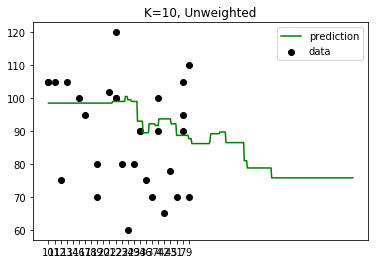

In [11]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

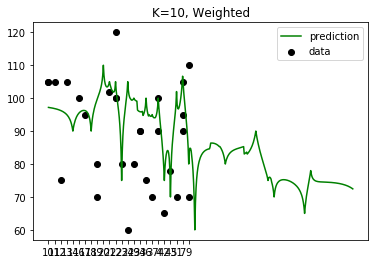

In [12]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [13]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


## Attempt 1 with just loudness as a feature

In [ ]:
## Your model here.
K = 24
f1 = pd.DataFrame(music.loudness)
f2 = pd.DataFrame(music.duration)
f1f2 = music[["loudness", "duration"]]

from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=K)
X = f1
Y = music.bpm
knn.fit(X, Y)

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=K, weights='distance')
X = f1
Y = music.bpm
knn_w.fit(X, Y)

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

## Attempt 2 with just duration as a feature

In [15]:
K = 24
f1 = pd.DataFrame(music.loudness)
f2 = pd.DataFrame(music.duration)
f1f2 = music[["loudness", "duration"]]

from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=K)
X = f2
Y = music.bpm
knn.fit(X, Y)

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=K, weights='distance')
X = f2
Y = music.bpm
knn_w.fit(X, Y)

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.28 (+/- 0.47)
Weighted Accuracy: -0.74 (+/- 0.76)


## Attempt 3 with both loudness and duration as a features

In [20]:
K = 24
f1 = pd.DataFrame(music.loudness)
f2 = pd.DataFrame(music.duration)
f1f2 = music[["loudness", "duration"]]

from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=K)
X = f1f2
Y = music.bpm
knn.fit(X, Y)

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=K, weights='distance')
X = f1f2
Y = music.bpm
knn_w.fit(X, Y)

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.28 (+/- 0.47)
Weighted Accuracy: -0.22 (+/- 0.59)


## Attempt 4 with both loudness and duration and normalized data as a features

In [21]:
K = 24
f1 = pd.DataFrame(music.loudness)
f2 = pd.DataFrame(music.duration)
f1f2 = music[["loudness", "duration"]]

from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=K)
X = f1f2
Y = music.bpm

from sklearn import preprocessing
X = preprocessing.scale(X)

knn.fit(X, Y)

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=K, weights='distance')
X = f1f2
Y = music.bpm
knn_w.fit(X, Y)

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.28 (+/- 0.47)
Weighted Accuracy: -0.22 (+/- 0.59)


Seems like this is just not a good data set to predict this BPM.